## Predicting Covid 19  Disease Through Symptoms

In [234]:
#importing the libararis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("covid_data.csv")

In [3]:
df.head()

Age  Fever  BodyPains  RunnyNose  Difficulty_in_Breath  \
0   60    100          1          1                     1   
1   75    102          1          0                     0   
2   25     98          0          0                     0   
3   34     97          0          0                     0   
4    4     96          0          1                     0   

   infection_Probability  
0                      0  
1                      1  
2                      1  
3                      0  
4                      1

## Data prepocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7104 entries, 0 to 7103
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    7104 non-null   int64
 1   Fever                  7104 non-null   int64
 2   BodyPains              7104 non-null   int64
 3   RunnyNose              7104 non-null   int64
 4   Difficulty_in_Breath   7104 non-null   int64
 5   infection_Probability  7104 non-null   int64
dtypes: int64(6)
memory usage: 333.1 KB


In [5]:
df.describe

<bound method NDFrame.describe of       Age  Fever  BodyPains  RunnyNose  Difficulty_in_Breath  \
0      60    100          1          1                     1   
1      75    102          1          0                     0   
2      25     98          0          0                     0   
3      34     97          0          0                     0   
4       4     96          0          1                     0   
...   ...    ...        ...        ...                   ...   
7099   60    108          1          1                     1   
7100   22    104          0          0                     0   
7101    7    102          0          0                     0   
7102   17     98          0          0                     1   
7103   90     99          0          0                     1   

      infection_Probability  
0                         0  
1                         1  
2                         1  
3                         0  
4                         1  
...              

In [6]:
df.isnull().sum() #checking weather there are null values in the dataset

Age                      0
Fever                    0
BodyPains                0
RunnyNose                0
Difficulty_in_Breath     0
infection_Probability    0
dtype: int64

<AxesSubplot:>

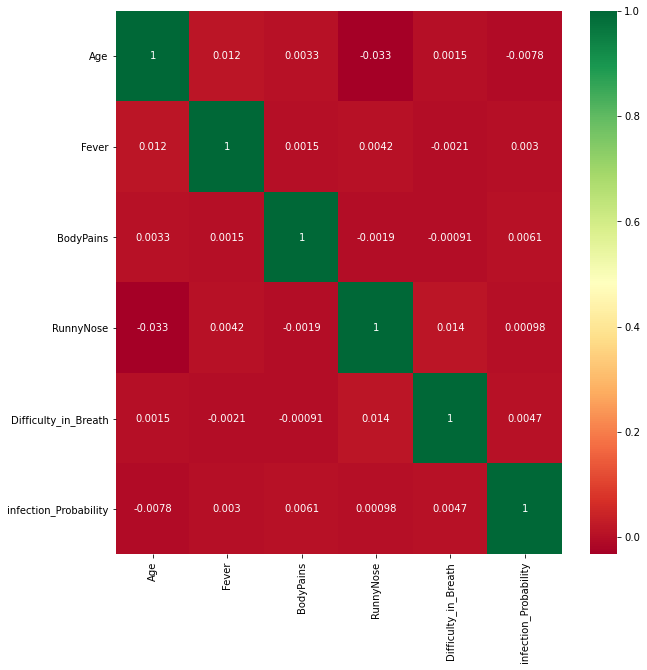

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

In [8]:
#the above data is positively correleated

In [9]:
df.corr()

Age     Fever  BodyPains  RunnyNose  \
Age                    1.000000  0.012309   0.003278  -0.033097   
Fever                  0.012309  1.000000   0.001500   0.004238   
BodyPains              0.003278  0.001500   1.000000  -0.001906   
RunnyNose             -0.033097  0.004238  -0.001906   1.000000   
Difficulty_in_Breath   0.001538 -0.002075  -0.000909   0.013623   
infection_Probability -0.007814  0.003000   0.006114   0.000980   

                       Difficulty_in_Breath  infection_Probability  
Age                                0.001538              -0.007814  
Fever                             -0.002075               0.003000  
BodyPains                         -0.000909               0.006114  
RunnyNose                          0.013623               0.000980  
Difficulty_in_Breath               1.000000               0.004652  
infection_Probability              0.004652               1.000000

C:\Users\Suhas\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='infection_Probability', ylabel='count'>

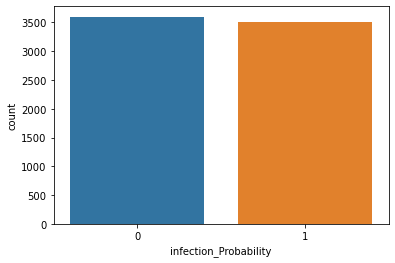

In [10]:
sns.countplot(df['infection_Probability'])

In [11]:
#Therefore the dataset is balanced

In [12]:
X=df.iloc[:,0:5]
pd.DataFrame(X).head(6)

Age  Fever  BodyPains  RunnyNose  Difficulty_in_Breath
0   60    100          1          1                     1
1   75    102          1          0                     0
2   25     98          0          0                     0
3   34     97          0          0                     0
4    4     96          0          1                     0
5   12     98          0          0                     0

In [13]:
y=df.iloc[:,-1]
pd.DataFrame(y).head()

infection_Probability
0                      0
1                      1
2                      1
3                      0
4                      1

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [16]:
X_train

Age  Fever  BodyPains  RunnyNose  Difficulty_in_Breath
5572   21    104          0          0                     0
3609    8     96          0          0                     1
6399   50    108          0          1                     1
5812   89    100          0          0                     1
413    20    104          0          1                     0
...   ...    ...        ...        ...                   ...
4931   10     99          0          0                     0
3264   46     98          0          1                     0
1653   66    103          1          1                     0
2607   56    104          0          0                     1
2732    5    107          1          0                     0

[5683 rows x 5 columns]

In [17]:
y_train

5572    0
3609    0
6399    0
5812    1
413     0
       ..
4931    0
3264    1
1653    1
2607    0
2732    1
Name: infection_Probability, Length: 5683, dtype: int64

In [18]:
X_train.shape,y_train.shape,X_test.shape,X_test.shape

((5683, 5), (5683,), (1421, 5), (1421, 5))

## Model Evaluation through Logistic Regression Classifier 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [20]:
log=LogisticRegression(C=100,solver='newton-cg')
log.fit(X_train,y_train)
print("train score",log.score(X_train,y_train))
print("test score",log.score(X_test,y_test))
log

train score 0.5129333098715467
test score 0.4651653764954258


LogisticRegression(C=100, solver='newton-cg')

In [21]:
log_predict=log.predict(X_test)

In [22]:
result = accuracy_score(log_predict,y_test)

In [23]:
from sklearn.model_selection import GridSearchCV
model=LogisticRegression(max_iter=2000)
solvers=['newton-cg','lbfgs','liblinear']
penalty=['l2']
c_values=[100, 10, 1.0, 0.1, 0.01, 0.001]

parameters=dict(solver=solvers,penalty=penalty,C=c_values)

grid_search_log=GridSearchCV(estimator=model,param_grid=parameters,cv=5)
grid_search_log.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=2000),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [24]:
grid_log=grid_search_log.predict(X_test)

In [259]:
accuracy_score(grid_log,y_test)

0.4665728360309641

In [260]:
#therefore we got good accuracy through logistic Regression

## Model Evaluation through Random Forest Classifier 

In [261]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [262]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [263]:
rf.score(X_train,y_train)

0.8926623262361428

In [264]:
rf.predict(X_test)

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [265]:
from sklearn.model_selection import RandomizedSearchCV

In [266]:

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]



In [267]:
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [268]:
from sklearn.model_selection import RandomizedSearchCV
classifier = RandomizedSearchCV(rf,parameters,n_jobs=-1,scoring="roc_auc",cv=5,n_iter=15,verbose=3,random_state=0)

In [269]:
classifier.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 124, 228, 332, 436,
                                                         541, 645, 749, 853,
                                                         957, 1062, 1166, 1270,
                                                         1374, 1478, 1583, 1687,
                                                         1791, 1895, 2000]},
                   random_state=0, scoring='roc_auc', verbose=3)

In [270]:

classifier.best_params_


{'n_estimators': 1583,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [271]:
classifier.score(X_test,y_test)

0.50563313233894

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=5,n_jobs=-1)

In [ ]:
score

In [ ]:

import pickle

with open('covid19_prototype.pkl', 'wb') as f:

    pickle.dump(classo,f)